# PREGUNTA 1

## IMPORTANDO LIBRERIAS

In [8]:
# utilizado para la manipulación de directorios y rutas
import os
# Cálculo científico y vectorial para python
import numpy as np
# Libreria para graficos
from matplotlib import pyplot
# Modulo de optimizacion en scipy
from scipy import optimize
# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline
import pandas as pd
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## LEER DATA SETS

In [9]:
fashion_train = '/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/DATASETs/fashion-mnist_train.csv'
data = np.loadtxt(fashion_train, skiprows=1, delimiter=',')
fashion_train = '/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/DATASETs/fashion-mnist_test.csv'
test = np.loadtxt(fashion_train, skiprows=1, delimiter=',')

In [10]:
from logging import error
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784
# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
_labels = 10 # numero de resultados 1,2,3,4,5,6,7,8,9
#  datos de entrenamiento almacenados en los arreglos X, y
X, y = data[:,1:], data[:,0]
X = np.append(X, test[:,1:], axis=0)
y = np.append(y, test[:,0], axis=0)
# y.append(test[:,0])
print('el 80% es: ', 70000*0.80)
X =  X[0:56000]
y = y[0:56000]
# x_trans = []
# for i in range(56000):
#   transpuesta = X[i].T
#   x_trans.append(transpuesta)
# # print(y[6999])
# X = np.array(x_trans)
m = y.size
print(m)
# print('dimensiones ', X.ndim)

el 80% es:  56000.0
56000


## MOSTRANDO IMAGENES ALEATORIAMENTE

In [11]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')
    # print('dimensiones ', X.ndim)

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width
    # print(example_width,example_height)
    # Calcula el ero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m))) #3,4 --> 3
    display_cols = int(np.ceil(m / display_rows)) # 3,4 --> 4
    # print(display_rows,display_cols) 
    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)
    # print(fig,ax_array)
    ax_array = [ax_array] if m == 1 else ax_array.ravel() 
    # print(m)
    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

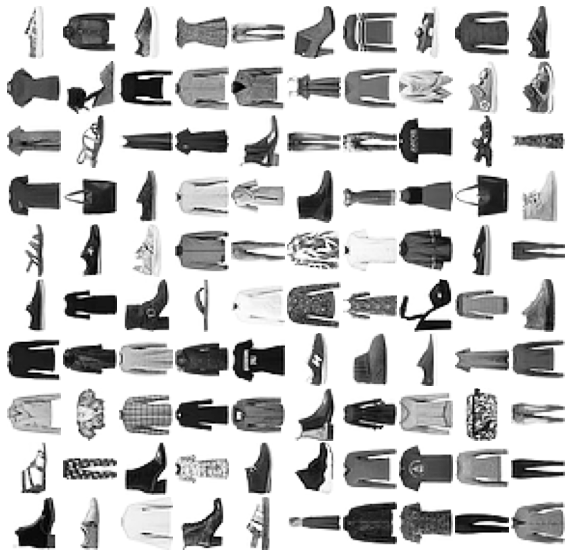

In [12]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False) # generar un array de 100 eros aleatorios sin repetirce = replace
# print(rand_indices)
sel = X[rand_indices, :] #obtiene el valor de X en cada posicon generada en posicion rand_indices
# print(sel[0])
# print(X[rand_indices[0]])
displayData(sel) # muestra uma imagen 2D de datos que estan en X segun  los indices generados en rand_indices

## FUNCION DE COSTO

In [13]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

def lrCostFunction(theta, X, y, lambda_):
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size # cantidad de datos 
    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    temp = theta
    temp[0] = 0
  
#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [14]:
# print('teta',theta_t, '  x:',X_t,'  y:', y_t,'  lamda:',lambda_t)
# J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

# print('Costo         : {:.6f}'.format(J))
# print('Costo esperado: 2.534819')
# print('-----------------------')
# print('Gradientes:')
# print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
# print('Gradientes esperados:')
# print(' [0.146561, -0.548558, 0.724722, 1.398003]');

## ONE VS ALL

In [15]:
def oneVsAll(X, y, _labels, lambda_):
    # algunas variables utiles
    m, n = X.shape
    # print('m:',m,',  n:',n)
    all_theta = np.zeros((_labels, n + 1))# crea una array de 0 de _labels elementos de n+1(+1 es por el tetha 0) de tamaño (10, 401)

    # Agrega unos a la matriz X -> 1,x
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    initial_theta = np.zeros(n + 1) # genera un vector de n+1(en este casp 401) de ceros
    # print('initia_theta',initial_theta)
    for c in np.arange(_labels):
        options = {'maxiter': 50} # para mejorar la precicion de tetha
        res = optimize.minimize(lrCostFunction, # funcion para el costo
                                initial_theta, # n+1 de ceros
                                (X, (y == c), lambda_), # devuelve valores de X donde y = c(0,1,2,3,4,5,6,7,8,9), lamba es el coeficiente de aprendizaje
                                jac=True, # usa el recurso del calculo computacional GPU
                                method='CG', # metodo de decenso por el gradiente mas optimizado
                                options=options) # optimiza, minimiza la funcion de costo, encontrar los valor de tetha que minimice
        
        all_theta[c] = res.x # devulve todas las tethas optimizadas

    return all_theta # [[..10]...400]

In [16]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, _labels, lambda_)
print(all_theta.shape)
print(all_theta[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


(10, 785)
[-1.20486218e-04 -2.94450111e-06  1.71893943e-06  3.15934479e-05
  1.04764508e-04 -1.03917591e-04 -5.53153687e-05 -4.09363579e-04
 -9.90120164e-04 -5.51229805e-04 -6.49576630e-04 -1.52223654e-03
  2.05286353e-03 -2.94419613e-04 -2.48382245e-03 -2.26501720e-03
 -2.60005616e-03  2.27126514e-03  7.81508067e-04 -4.67402814e-04
  3.37603183e-04  4.34823713e-04 -4.64123878e-04 -3.38007886e-04
 -2.71027524e-04  1.84717134e-05  1.28312132e-04 -2.25963617e-05
 -4.76180917e-07  2.31025559e-06  1.84936912e-06  1.02642329e-04
  2.45730503e-04 -4.11471413e-05 -1.21760755e-03 -2.68728302e-03
 -1.17091810e-03 -4.91416815e-04 -1.92703614e-03 -7.07086971e-04
  8.91144920e-04 -1.03971396e-03 -8.34348553e-04 -9.37884525e-05
 -2.03563667e-04  6.75301737e-04  1.41323512e-03  1.04227497e-04
 -6.79108165e-06  2.23701972e-03  8.25103711e-04  4.24960382e-04
 -1.37153937e-04 -5.03265046e-05  2.65471198e-04  7.91593864e-06
  4.10036281e-05 -6.40364803e-07 -7.53462905e-05 -1.29554088e-04
  3.84042345e-0

## PREDICCCION

In [17]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    _labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p


def labell(num):
  valor ={
      0: 'Camisa',
      1: 'Pantalon',
      2: 'Jersey',
      3: 'Vestido',
      4: 'Abrigo',
      5: 'Sandalia',
      6: 'Camisa',
      7: 'Zapatilla',
      8: 'Bolso',
      9: 'Botín'
  } 
  return valor.get(num, 'Desconocido')

p: [6]
y: [6.] Camisa
Segun la prediccion esto es un  Camisa con un 85.60% de preciscion


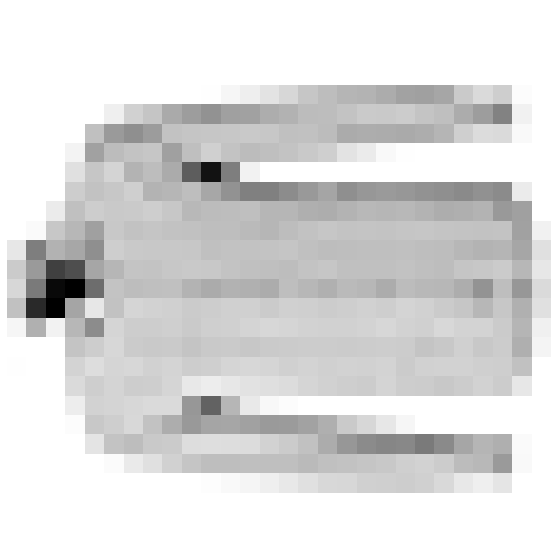

In [18]:
p_min, p_max = 48005, 48006
# print('tamaño: ',X.shape)
pred = predictOneVsAll(all_theta, X)
# print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[p_min:p_max, :].copy()
# print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((1, 1)), XPrueba], axis=1)
# print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print('p:',p)
print('y:', y[p_min:p_max], labell(y[p_min]))
print('Segun la prediccion esto es un ',labell(p[0]), 'con un {:.2f}%'.format(np.mean(pred == y) * 100), 'de preciscion' )

displayData(X[p_min:p_max, :])